## ANALYSE MANSUELLE DES DONNEES D'UNE ENTREPRISE DE SMARTPHONES ET GADGETS

## preocupations :


            Qu'elle est le mois qui a le plus grand chiffre d'affaire ?
            Qu'elle est la ville avec le plus de commande ?
            A quel moment doit on faire une campagne publicitaire pour avoir plus de vente ?
            Quel produit se vend le plus ?
            Qu'elles sont le 5 premiers de combinaison de produits les plus  achetes

### Avant de repondre aux differentes preocupations du client nous allons charger notre data

In [82]:
# chargement des bibliotheques

import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# tuple contenent le nom des fichiers
file_names = os.listdir(r'C:\Users\Mr_B\Desktop\datas')
file_names

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [84]:
# creation du fichier de base

data = pd.DataFrame()

for name in file_names:
    current_data = pd.read_csv(r'C:\Users\Mr_B\Desktop\Projet AD\datas'+'/'+ name)
    print(current_data.shape)
    data = pd.concat([data, current_data])
  

print('DATA : ',data.shape)

data.to_csv(r'C:\Users\Mr_B\Desktop\Projet AD'+'/'+'data.csv')
print("It's OK")


(18383, 6)
(12011, 6)
(25117, 6)
(12036, 6)
(9723, 6)
(14371, 6)
(13622, 6)
(15226, 6)
(16635, 6)
(17661, 6)
(20379, 6)
(11686, 6)
DATA :  (186850, 6)
It's OK


In [ ]:
# valeurs manquantes
data.head(3)
print(data.isnull().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [86]:
# suppression des valeurs manquantes du faite de leurs petits nombres

data.dropna(how='all', inplace=True)
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### 1 ) Qu'elle est le mois qui a le plus grand chiffre d'affaire ?

In [87]:
"""
Etapes de resolution :
a. creation des colonnes dates et sales
    dates = mois d'achet d'un produits
    sales = Quantity Ordered	 *     Price Each
b. groupby('date), graphe et reponse 

"""

"\nEtapes de resolution :\na. creation des colonnes dates et sales\n    dates = mois d'achet d'un produits\n    sales = Quantity Ordered\t *     Price Each\nb. groupby('date), graphe et reponse \n\n"

In [88]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


a. creation des colonnes dates et sales

In [89]:
### Dates

def Mouths(x) :
    return x.split('/')[0]

In [90]:
data['Dates'] = data['Order Date'].apply(Mouths)
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [91]:
# verificatiion de la colonne dates
data['Dates'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [92]:
data = data[data['Dates'] != 'Order Date']
data['Dates'].unique()


array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [93]:
data['Dates'] = data['Dates'].astype(int)
data['Dates'].dtypes

dtype('int64')

In [94]:
### Sales
data.head(3)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [95]:
# conversion des types
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Price Each'] = data['Price Each'].astype(float)


In [96]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99


### b. groupby('dates)


In [97]:
data.groupby('Dates')['Sales'].sum()

Dates
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

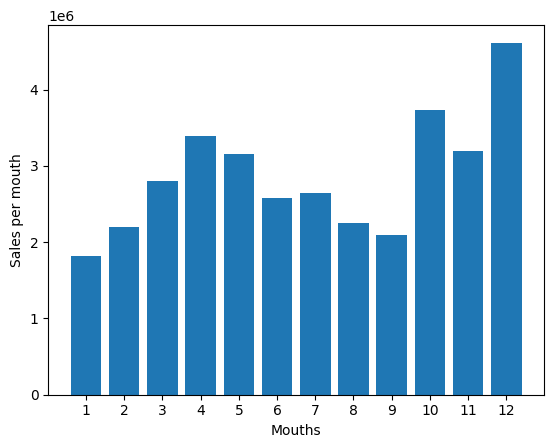

In [98]:
index = data.groupby('Dates')['Sales'].sum().index
sales = data.groupby('Dates')['Sales'].sum()
plt.bar(index, sales)
plt.xticks(index)
plt.xlabel('Mouths')
plt.ylabel('Sales per mouth')

plt.show()


le mois de decembre est le mois qui realise le plus grands choffre d'affaire

## Qu'elle est la ville avec le plus de commande ?

In [99]:
"""
Etapes de resolution :
a. creation des colonnes citys 
    citys = le nom de la ville
    
b. groupby('citys), graphe et reponse 

"""

"\nEtapes de resolution :\na. creation des colonnes citys \n    citys = le nom de la ville\n    \nb. groupby('citys), graphe et reponse \n\n"

In [100]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


### a. creation des colonnes citys 


In [101]:
# function d'extraction
def city(x):
    return x.split(',')[1]

In [102]:
data['Citys'] = data['Purchase Address'].apply(city)
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


### b. groupby('citys), graphe et reponse 

In [103]:
data.groupby('Citys')['Quantity Ordered'].sum()

Citys
Atlanta          16602
Austin           11153
Boston           22528
Dallas           16730
Los Angeles      33289
New York City    27932
Portland         14053
San Francisco    50239
Seattle          16553
Name: Quantity Ordered, dtype: int64

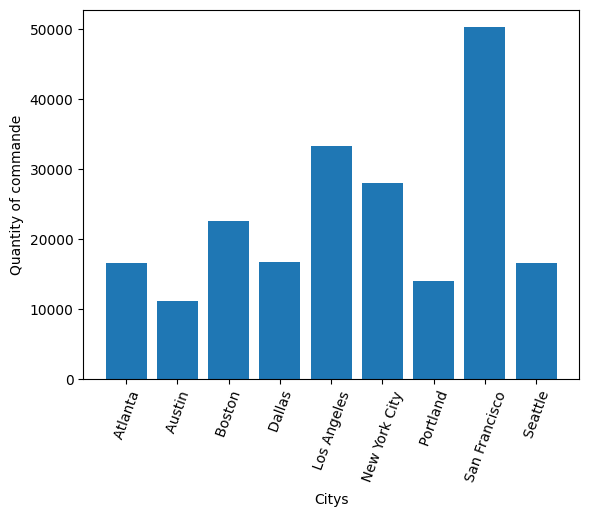

In [104]:
index = data.groupby('Citys')['Quantity Ordered'].sum().index
number = data.groupby('Citys')['Quantity Ordered'].sum()

plt.bar(index, number)
plt.xticks(index, rotation=70)
plt.xlabel('Citys')
plt.ylabel('Quantity of commande')

plt.show()

San Francisco est la ville qui a fait le plus commande

## A quel moment doit on faire une campagne publicitaire pour avoir plus de vente ?

In [105]:
"""
Etapes de resolution :
a. creation des colonnes Hours 
    Hours = l'heure extrait de adresse
    
b. groupby('hours), graphe et reponse 

"""

"\nEtapes de resolution :\na. creation des colonnes Hours \n    Hours = l'heure extrait de adresse\n    \nb. groupby('hours), graphe et reponse \n\n"

In [106]:
data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


a. creation des colonnes Hours 

In [107]:
data['hours'] = pd.to_datetime(data['Order Date']).dt.hour
data.head(3)

C:\Users\Mr_B\AppData\Local\Temp\ipykernel_18700\3744982882.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hours'] = pd.to_datetime(data['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys,hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14


b. groupby('hours), graphe et reponse 

In [108]:
# index des clients par heures
data.groupby('hours')['Order ID'].unique()

hours
0     [176575, 176580, 176610, 176667, 176676, 17668...
1     [176648, 176737, 176809, 176907, 176991, 17703...
2     [176644, 176818, 176945, 177082, 177214, 17725...
3     [176978, 177501, 177831, 178077, 178288, 17871...
4     [176588, 176628, 176788, 177687, 177906, 17809...
5     [176630, 176712, 176819, 176873, 176976, 17707...
6     [176682, 176900, 176943, 176944, 177042, 17704...
7     [176563, 176591, 176603, 176646, 176728, 17674...
8     [176558, 176617, 176634, 176638, 176649, 17665...
9     [176561, 176595, 176602, 176635, 176675, 17669...
10    [176564, 176565, 176579, 176604, 176615, 17662...
11    [176576, 176585, 176590, 176629, 176663, 17667...
12    [176568, 176582, 176583, 176589, 176607, 17660...
13    [176562, 176592, 176593, 176597, 176611, 17665...
14    [176560, 176566, 176571, 176606, 176627, 17663...
15    [176570, 176599, 176600, 176686, 176740, 17674...
16    [176605, 176609, 176621, 176639, 176650, 17665...
17    [176567, 176586, 176660, 176689, 176

In [109]:
# nombre de personnes par heures
index = range(0, 24)
personnes = []
for cx in data.groupby('hours')['Order ID'].unique():
    personnes.append(len(cx))


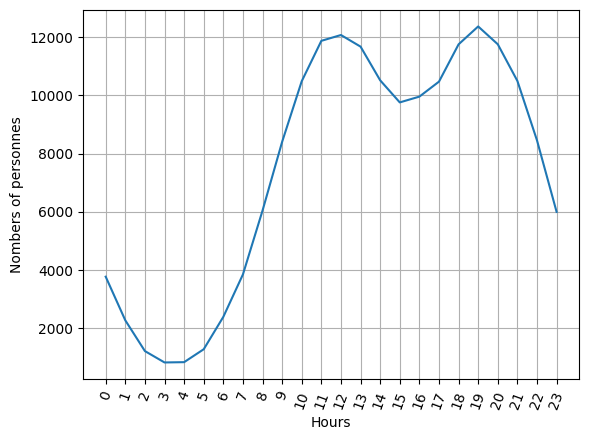

In [110]:
plt.grid()
plt.plot(index, personnes)
plt.xticks(index, rotation=70)
plt.xlabel('Hours')
plt.ylabel('Nombers of personnes')

plt.show()

il serait ideal de faire un campagne publicitaire 10 a 21

 ## Quel produit se vend le plus ?

In [111]:
"""
Etapes de resolution :
a. groupby(Product)[Quantity Ordered].sun()
    
b. groupby(Product)[Price Each].mean()

c. reponse

"""

'\nEtapes de resolution :\na. groupby(Product)[Quantity Ordered].sun()\n    \nb. groupby(Product)[Price Each].mean()\n\nc. reponse\n\n'

In [112]:
data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys,hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14


a. groupby(Product)[Quantity Ordered].sun()

<Axes: xlabel='Product'>

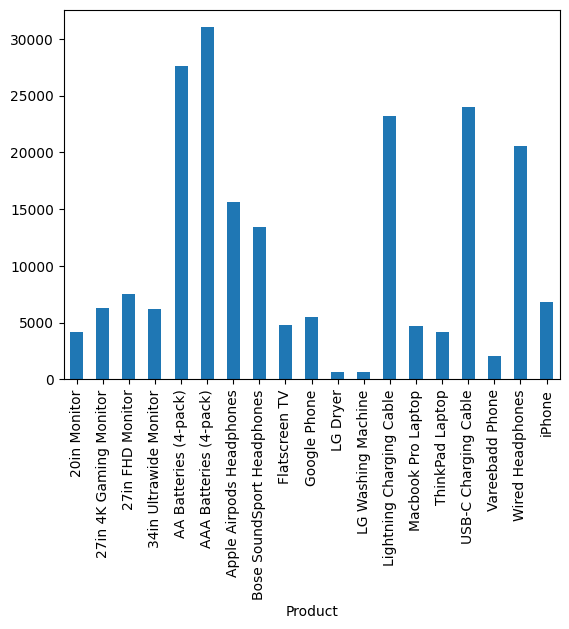

In [113]:
# le nombre de commande par produit durant l'annee 2019
data.groupby('Product')['Quantity Ordered'].sum().plot.bar()

b. groupby(Product)[Price Each].mean()

<Axes: xlabel='Product'>

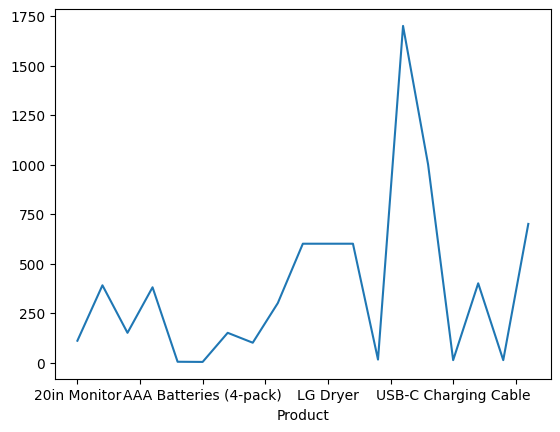

In [114]:
# le prix moyen par produit
data.groupby('Product')['Price Each'].mean().plot.line()

c. reponse

C:\Users\Mr_B\AppData\Local\Temp\ipykernel_18700\3368293762.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

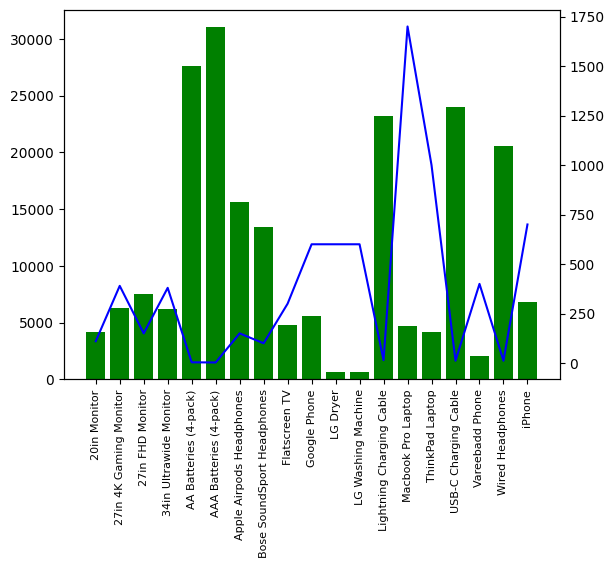

In [115]:
products = data.groupby('Product')['Quantity Ordered'].sum().index
quantitys = data.groupby('Product')['Quantity Ordered'].sum()
prices = data.groupby('Product')['Price Each'].mean()


plt.figure(figsize=(40,24))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantitys, color='g' )
ax2.plot(products, prices, '-b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

on constate que les produits les plus vendus ont un prix bas 

### Qu'elles sont les 5 premiers de combinaison de produits les plus  achetes

In [119]:
# regrouper la donnes selon les id qui se repete
df = data[data['Order ID'].duplicated(keep=False)]
df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys,hours
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19


In [129]:
# regroupons les article appartenant a chaque client dans  Grouped
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(4)

C:\Users\Mr_B\AppData\Local\Temp\ipykernel_18700\689168606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys,hours,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"


In [132]:
# suppression des id repetes
df.drop_duplicates(subset=['Order ID'], inplace=True)
df.head(4)

C:\Users\Mr_B\AppData\Local\Temp\ipykernel_18700\1229807748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['Order ID'], inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Dates,Sales,Citys,hours,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"


<Axes: ylabel='count'>

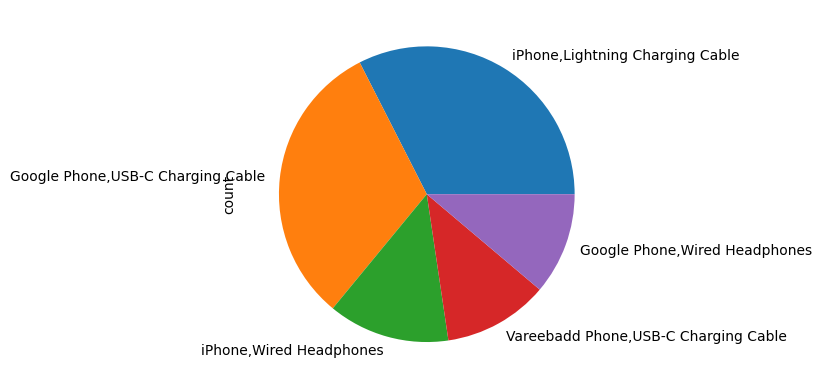

In [135]:
df['Grouped'].value_counts()[0:5].plot.pie()